In [ ]:
import warnings
warnings.filterwarnings("ignore")

from collections import Counter

In [9]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

sys.path.append("../src")

#from utils import *
#from classification import *
#from inference import *
global_aa = list("ACDEFGHIKLMNPQRSTVWY")

## Apply classification models to ELISA verified sequences

### Process data

In [13]:
test=result["Sequence"]

pad=np.vectorize(pad_sequence)
test=pad(test, "J", 20)
test=test.astype("object")
dat=process(test)
dat=torch.tensor(np.array(dat),  dtype = torch.float32)

### Compute unrelated target predictions

In [ ]:
bsa=compute_pred_labels("../experiments/bsa/", dat).reshape(-1)
bv=compute_pred_labels("../experiments/bv/", dat).reshape(-1)
tgfb=compute_pred_labels("../experiments/tgfb/", dat).reshape(-1)

In [ ]:
final_pred=[]
for i in range(48):
    if bsa[i]==1 or tgfb[i]==1 or bv[i]==1:
        final_pred.append("Non-specific")
    else:
        final_pred.append("Anti-id (specific)")

# Plot unrelated targets counterselection results

In [11]:
result = pd.read_csv("../data/TableS1.csv")
result=result.set_index(['Experiment','Sequence'])

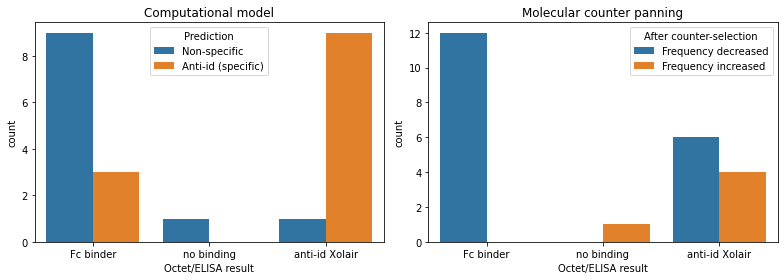

In [24]:
f,axs=plt.subplots(1,2,figsize=(11,4))
d=result.loc['Xolair']
#d=d.sample(frac=1)
#d=d[d['Experiment Result']!='not specific']
d=d.sort_values(by="Unrelated targets prediction",ascending=False)
ax=sns.countplot(x='Ground-truth labels',order=['Fc binder','no binding','anti-id Xolair'],hue='Unrelated targets prediction',data=d,ax=axs[0], palette=["C0", "C1"])
ax.set_xlabel('Octet/ELISA result')#,fontsize=15)
ax.set_title('Computational model')#,fontsize=15)
ax.legend(title='Prediction',loc='upper center')#bbox_to_anchor=(1.01, 1))
ax=sns.countplot(x='Ground-truth labels',order=['Fc binder','no binding','anti-id Xolair'],hue='After counter-selection',data=d,ax=axs[1])
ax.set_xlabel('Octet/ELISA result')
ax.set_title('Molecular counter panning')
plt.tight_layout()

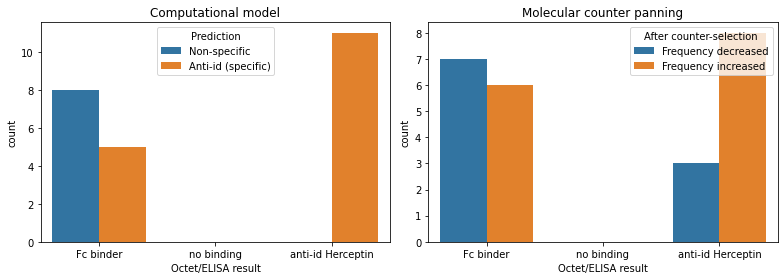

In [18]:
f,axs=plt.subplots(1,2,figsize=(11,4))
d=result.loc['Herceptin']
#d=d[d['Experiment Result']!='not specific']
ax=sns.countplot(x='Ground-truth labels',order=['Fc binder','no binding','anti-id Herceptin'],hue='Unrelated targets prediction',data=d,ax=axs[0])
ax.set_xlabel('Octet/ELISA result')#,fontsize=15)
ax.set_title('Computational model')#,fontsize=15)
ax.legend(title='Prediction',loc='upper center')#bbox_to_anchor=(1.01, 1))
ax=sns.countplot(x='Ground-truth labels',order=['Fc binder','no binding','anti-id Herceptin'],hue='After counter-selection',data=d,ax=axs[1])
ax.set_xlabel('Octet/ELISA result')
ax.set_title('Molecular counter panning')
plt.tight_layout()